In [2]:
import numpy as np

# Apenas para plotar gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [17]:
def tanh(x):
  return np.tanh(x)

def tanh_derivate(x):
  return 1 - np.tanh(x)**2

def loss_fn(y_pred, y_true):
  return np.mean((y_pred - y_true)**2)

def d_loss_y_pred(y_pred, y_true):
  return 2 * (y_pred - y_true) / y_true.size

In [32]:
np.random.seed(42)
'''
# Pesos entre camada de input e a oculta -> W1
W1 = np.random.randn(1,10) * 0.1
b1 = np.zeros((1,10))

# Pesos entre camada de oculta e a saída -> W2
W2 = np.random.randn(10,1) * 0.1
b2 = np.zeros((1,1))
'''
# Pesos entre camada de input e a oculta -> W1
# A inicialização com valores aleatórios estava extendendo muito o número de epocas
# o uso da técinica: Xavier/Glorot Initialization for tanh busca iniciar já com bons pesos
n_in_W1 = 1
n_out_W1 = 20
std_dev_W1 = np.sqrt(2 / (n_in_W1 + n_out_W1))
W1 = np.random.randn(n_in_W1, n_out_W1) * std_dev_W1
b1 = np.zeros((1, n_out_W1))

# Pesos entre camada de oculta e a saída -> W2
n_in_W2 = 20
n_out_W2 = 1
std_dev_W2 = np.sqrt(2 / (n_in_W2 + n_out_W2))
W2 = np.random.randn(n_in_W2, n_out_W2) * std_dev_W2
b2 = np.zeros((1, n_out_W2))

In [33]:
# x é a entrada na rede
def forward(x):
  z1 = x @ W1 + b1
  ativ = tanh(z1)
  z2 = ativ @ W2 + b2
  y_pred = z2
  return y_pred, z1, ativ, z2

In [34]:
def backprop(current_lr):
  global W1, b1, W2, b2
  # backpropagation

  # learning rate

  # Gradiente para W2 e b2

  dW2 = ativ.T @ d_loss_y_pred(y_pred, y_true) #ativ.T é a transposta da ativação da camada anterior (L-1)
  db2 = np.sum(d_loss_y_pred(y_pred, y_true), axis=0, keepdims=True)

  # propagar o erro para a camada oculta
  d_ativ = d_loss_y_pred(y_pred, y_true) @ W2.T  # é a somatório dos pesos*delta desse neurônio da próxima camada

  # derivada da tanh
  #d_tanh = 1 - np.tanh(z1) ** 2

  # gradiente da camada oculta
  delta1 = d_ativ * tanh_derivate(z1) # é o δj(L) da camada interna

  # gradientes para W1 e b1
  dW1 = x.T @ delta1
  db1 = np.sum(delta1, axis=0, keepdims=True)

  #atualização dos pessos

  W2 -= current_lr * dW2
  b2 -= current_lr * db2

  W1 -= current_lr * dW1
  b1 -= current_lr * db1



In [35]:
batch_size = 64
initial_lr = 0.08
current_lr = initial_lr
decay_rate = 0.999995  # mais suave né tava mt agressivo kk
summing_loss = 0
mean_loss_atual = 1
mean_loss_anterior = 1
gaap_view = 500
loss_history = []

for epoch in range(1_000_000):
  if current_lr > 0.00001 :
    current_lr = initial_lr * (decay_rate ** epoch)

  x = np.random.uniform(-np.pi, np.pi, size=(batch_size, 1))
  y_true = np.sin(x)

  y_pred, z1, ativ, z2 = forward(x)
  error = loss_fn(y_pred, y_true)
  summing_loss += error

  backprop(current_lr)


  if epoch % gaap_view == 0:
    mean_loss_atual = summing_loss/gaap_view
    summing_loss = 0
    print(f"Epoch {epoch}, Mean loss: {mean_loss_atual:.8f}, Lr: {current_lr:.8f}")
    loss_history.append(mean_loss_atual)

    mean_loss_anterior = mean_loss_atual


  if epoch > 10 and mean_loss_atual < 0.000001:
    print(f"Convergiu na epoch {epoch} com Loss {mean_loss_atual:8f} ")
    break




Epoch 0, Mean loss: 0.00171898, Lr: 0.08000000
Epoch 500, Mean loss: 0.02587655, Lr: 0.07980025
Epoch 1000, Mean loss: 0.00744038, Lr: 0.07960100
Epoch 1500, Mean loss: 0.00558027, Lr: 0.07940224
Epoch 2000, Mean loss: 0.00464587, Lr: 0.07920398
Epoch 2500, Mean loss: 0.00446643, Lr: 0.07900622
Epoch 3000, Mean loss: 0.00554446, Lr: 0.07880895
Epoch 3500, Mean loss: 0.00477402, Lr: 0.07861218
Epoch 4000, Mean loss: 0.00687522, Lr: 0.07841589
Epoch 4500, Mean loss: 0.00593510, Lr: 0.07822009
Epoch 5000, Mean loss: 0.00516176, Lr: 0.07802479
Epoch 5500, Mean loss: 0.00609305, Lr: 0.07782997
Epoch 6000, Mean loss: 0.00616549, Lr: 0.07763564
Epoch 6500, Mean loss: 0.00449333, Lr: 0.07744179
Epoch 7000, Mean loss: 0.00678329, Lr: 0.07724843
Epoch 7500, Mean loss: 0.00500513, Lr: 0.07705555
Epoch 8000, Mean loss: 0.00673763, Lr: 0.07686315
Epoch 8500, Mean loss: 0.00363648, Lr: 0.07667123
Epoch 9000, Mean loss: 0.00563478, Lr: 0.07647979
Epoch 9500, Mean loss: 0.00568735, Lr: 0.07628883
Epoc

In [36]:
x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y_true = np.sin(x_test)
y_pred, *_ = forward(x_test)

error = loss_fn(y_pred, y_true)
print(f"Erro de teste: {error}")

Erro de teste: 1.0240696676605138e-06


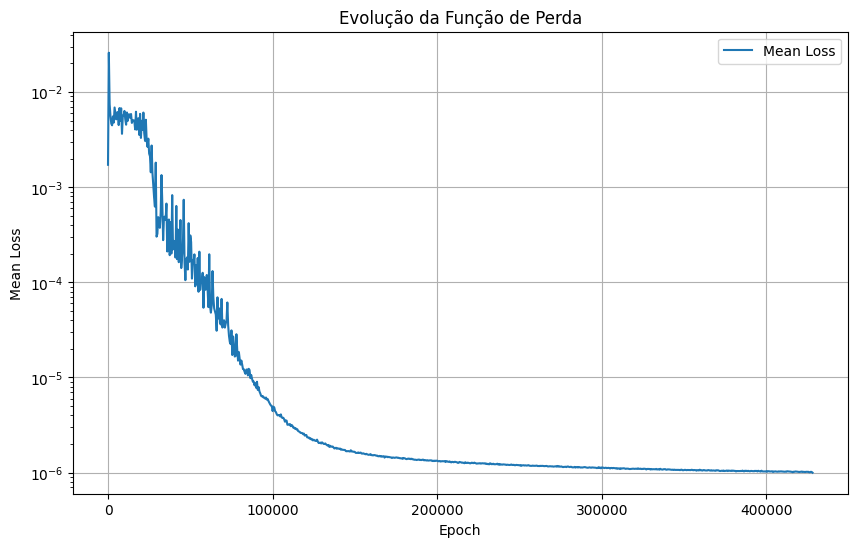

In [38]:

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(loss_history)*500, 500), loss_history, label='Mean Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Evolução da Função de Perda')
plt.yscale('log')  # Opcional: escala logarítmica para ver detalhes
plt.grid(True)
plt.legend()
plt.show()
# Depois que a perda alcançou 0.00000199 na epoca 132500 só abaixou para 0.0000001 295500 épocas depois
# não compensa, o aprendizado diminuiu demais nessa parte.

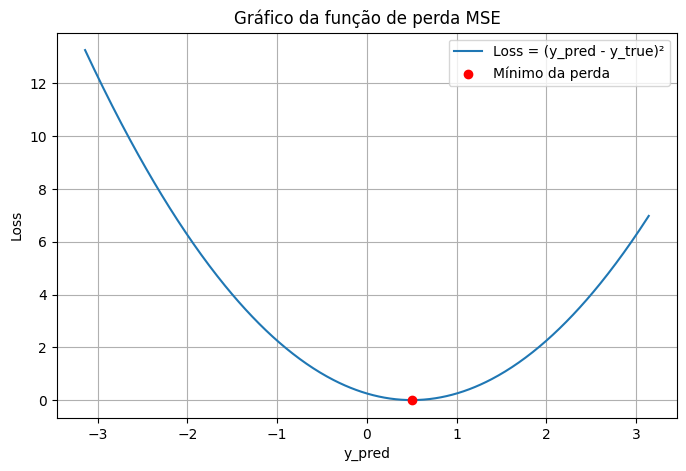

In [17]:
# Fixar um y_true
y_true = 0.5

# Variar y_pred de -2 a +2
y_pred = np.linspace(-np.pi, np.pi, 500)

# Calcular a loss para cada y_pred
loss = (y_pred - y_true) ** 2  # ou usar loss_fn(y_pred, y_true)

# Plotar
plt.figure(figsize=(8, 5))
plt.plot(y_pred, loss, label='Loss = (y_pred - y_true)²')
plt.scatter([y_true], [0], color='red', label='Mínimo da perda', zorder=5)
plt.xlabel('y_pred')
plt.ylabel('Loss')
plt.title('Gráfico da função de perda MSE')
plt.grid(True)
plt.legend()
plt.show()

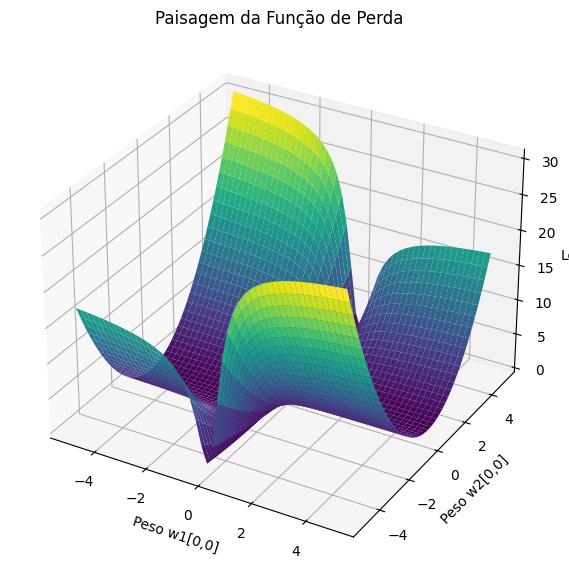

In [18]:
# Fixe um conjunto de entrada para o teste
x_test = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y_test = np.sin(x_test)

# Defina as faixas dos dois pesos que quer variar
w1_range = np.linspace(-5, 5, 50)
w2_range = np.linspace(-5, 5, 50)

# Matriz para armazenar os valores de perda
loss_surface = np.zeros((len(w1_range), len(w2_range)))

# Salve os pesos originais para restaurar depois
original_w1 = W1[0, 0]
original_w2 = W2[0, 0]

# Loop para calcular a perda para cada combinação de pesos
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        # Ajusta os pesos
        W1[0, 0] = w1_val
        W2[0, 0] = w2_val

        # Forward pass com pesos modificados
        y_pred, *_ = forward(x_test)

        # Calcula a perda
        loss_surface[i, j] = loss_fn(y_pred, y_test)

# Restaura os pesos originais
W1[0, 0] = original_w1
W2[0, 0] = original_w2

# Cria a malha para plotar
W1, W2 = np.meshgrid(w1_range, w2_range)

# Plot 3D da superfície de perda
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(W1, W2, loss_surface.T, cmap='viridis')

ax.set_xlabel('Peso w1[0,0]')
ax.set_ylabel('Peso w2[0,0]')
ax.set_zlabel('Loss')

plt.title('Paisagem da Função de Perda')
plt.show()

In [19]:
fig = go.Figure(data=[go.Surface(z=loss_surface.T, x=W1, y=W2, colorscale='Viridis')])

fig.update_layout(
    title='Paisagem da Função de Perda',
    scene = dict(
        xaxis_title='Peso w1[0,0]',
        yaxis_title='Peso w2[0,0]',
        zaxis_title='Loss'
    )
)

fig.show()

In [30]:
num_tests = 10

for _ in range(num_tests):
  valor = np.random.uniform(-np.pi, np.pi, size=(1, 1))
  x = np.array(valor)
  y_pred, _, _, _ = forward(x)

  print(f"input: {valor[0][0]:.4f}" )
  print(f"Predição: {y_pred[0][0]:.4f}")
  print(f"sin({valor[0][0]:.4f}): {np.sin(valor)[0][0]:.4f}")
  print("-" * 20)

input: 0.3715
Predição: 0.3633
sin(0.3715): 0.3630
--------------------
input: 0.4021
Predição: 0.3916
sin(0.4021): 0.3913
--------------------
input: -0.7971
Predição: -0.7131
sin(-0.7971): -0.7153
--------------------
input: -2.9356
Predição: -0.2067
sin(-2.9356): -0.2045
--------------------
input: -0.2175
Predição: -0.2167
sin(-0.2175): -0.2158
--------------------
input: -0.2651
Predição: -0.2627
sin(-0.2651): -0.2620
--------------------
input: 1.5640
Predição: 1.0009
sin(1.5640): 1.0000
--------------------
input: 2.1169
Predição: 0.8535
sin(2.1169): 0.8546
--------------------
input: 2.2898
Predição: 0.7505
sin(2.2898): 0.7525
--------------------
input: -2.7170
Predição: -0.4104
sin(-2.7170): -0.4120
--------------------
